In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


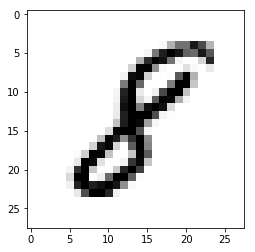

In [5]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [14]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [17]:
# Creating a Sequential Model and adding the layers
model = Sequential()
input_shape = (28, 28, 1)
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.2030 - acc: 0.9393
Epoch 2/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.0802 - acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.0562 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0442 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0345 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0288 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0250 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0218 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0207 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 47s 787us/step - loss: 

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 288us/step


[0.06868301523832925, 0.9839]

9


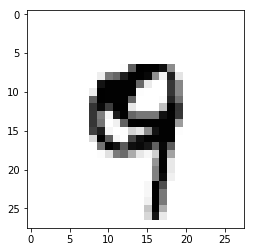

In [21]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())